In [120]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [121]:
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer


#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validatin libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics

#nlp specific
from sklearn.feature_extraction.text import CountVectorizer

#from sklearn.metrics import log_loss
#import sklearn as sk
from pandas.api.types import *

In [122]:
path = '../data/final_exam_practice_question2_datafiles/'

In [123]:
!tail -50 ../data/final_exam_practice_question2_datafiles/imports-85.names.txt

   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11.

In [124]:
train = pd.read_csv(path+'imports-85.data.txt', names= ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
          'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
          'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
          'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
          'price'])

In [6]:
#train, test = train_test_split(file, test_size=0.2)

In [7]:
#train = train.reset_index(drop=True)
#test =  test.reset_index(drop=True)

In [125]:
train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


### Prepare this dataset for running Random Forest. What are the steps you need to do?

You need to make sure all the columns are numeric and categories are one hot encoded. 

### Clean Data

In [126]:
#train['price'] = train['price'].astype('float64')

In [127]:
train = train.replace('?',np.nan)

In [128]:
train.isnull().sum().sort_values(ascending = False)/len(train)

normalized-losses    0.200000
price                0.019512
stroke               0.019512
bore                 0.019512
peak-rpm             0.009756
horsepower           0.009756
num-of-doors         0.009756
length               0.000000
make                 0.000000
fuel-type            0.000000
aspiration           0.000000
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
height               0.000000
width                0.000000
highway-mpg          0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
compression-ratio    0.000000
city-mpg             0.000000
symboling            0.000000
dtype: float64

**What type of data do I have?**
main types:
int64, float, object, category, datetime

In [129]:
train.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [131]:
train.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


Array vs Dataframe?

In [132]:
train['engine-location'].head(5)

0    front
1    front
2    front
3    front
4    front
Name: engine-location, dtype: object

## Slicing and Filtering the DataFrame

In [133]:
train[['engine-location','aspiration']].head(5)

,engine-location,aspiration
0,front,std
1,front,std
2,front,std
3,front,std
4,front,std


In [134]:
train.iloc[[0,1,2],]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [135]:
train.iloc[range(7),[3,5]]

,fuel-type,num-of-doors
0,gas,two
1,gas,two
2,gas,two
3,gas,four
4,gas,four
5,gas,two
6,gas,four


In [136]:
train[train['make'] == 'mazda']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [137]:
train[train['make'].isin(['mazda','toyota'])]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


In [138]:
print('this many columns:%d ' % len(train.columns))
train.columns

this many columns:26 


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [139]:
#train.columns = [  column names]

### Check for Blanks or NA's!  NaN, ", None

In [140]:
train[train['normalized-losses'].isnull()].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [141]:
train.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [142]:
train.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [143]:
!tail -50 ../data/final_exam_practice_question2_datafiles/imports-85.names.txt

   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda, mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11.

In [144]:
numeric_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [145]:
categorical_cols = [x for x in train.columns if x not in numeric_cols]

In [146]:
len(categorical_cols), len(numeric_cols)

(10, 16)

In [147]:
for col in categorical_cols:
    train[col] = train[col].astype('category')
for col in numeric_cols:
    train[col] = train[col].astype('float64')

In [31]:
train.dtypes

symboling             float64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
price                 float64
dtype: object

In [32]:
y = train['price']
X = train[train.columns[train.columns!='price']]

In [33]:
X.dtypes

symboling             float64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
dtype: object

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
print(type(X_train))

(164, 25) (41, 25) (164,) (41,)
<class 'pandas.core.frame.DataFrame'>


In [35]:
numeric_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

In [36]:
# training Imputation
y_train.fillna(y_train.median(),inplace=True)
for col in numeric_cols:
    X_train[col].fillna(X_train[col].median(),inplace = True)
for col in categorical_cols:
    X_train[col].replace(np.nan, 'NA', regex=True, inplace = True)
# validation Imputation
y_valid.fillna(y_train.median(),inplace=True)
for col in numeric_cols:
    X_valid[col].fillna(X_train[col].median(),inplace = True)
for col in categorical_cols:
    X_valid[col].replace(np.nan, 'NA', regex=True, inplace = True)


#for col in numeric_cols:
#    train[col].fillna(train[col].median(),inplace = True)
#for col in categorical_cols:
#    train[col].replace(np.nan, 'NA', regex=True, inplace = True)
#filling in with NA since we might want to know their importance
#train[col].replace(np.nan, 'NA', regex=True)

/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')
    
#for col in numeric_cols:
#   train[col] = train[col].astype('float64')

/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
type(y_train), type(y_valid), type(X_train), type(X_valid)

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [39]:
X_valid.dtypes

symboling             float64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
dtype: object

In [40]:
X_train.isnull().sum().sort_values(ascending = False),
X_valid.isnull().sum().sort_values(ascending = False),

(highway-mpg          0
 width                0
 normalized-losses    0
 make                 0
 fuel-type            0
 aspiration           0
 num-of-doors         0
 body-style           0
 drive-wheels         0
 engine-location      0
 wheel-base           0
 length               0
 height               0
 city-mpg             0
 curb-weight          0
 engine-type          0
 num-of-cylinders     0
 engine-size          0
 fuel-system          0
 bore                 0
 stroke               0
 compression-ratio    0
 horsepower           0
 peak-rpm             0
 symboling            0
 dtype: int64,)

### Feature Engineering
How to transform a column/ apply a functin against it
create as much columns as you can. 
#fld.dt.....
#train_cats
#apply_cats

In [41]:
## two ways to creat new fields

#train_df['LogSalePrice'] = train_df['SalePrice'].map(lambda x : np.log(x)) 
#or
#train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

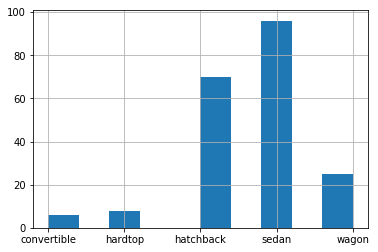

In [42]:
train['body-style'].hist()

In [43]:
## To make a categorical
#train_df['above_200k'] = train_df['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
#train_df['above_200k'] = train_df['above_200k'].astype('category')

In [44]:
#train_df.loc[train_df['SalePrice']>200000,'above_200k'] = 1
#train_df.loc[train_df['SalePrice']<=200000,'above_200k'] = 0
#train_df['above_200k'] = train_df['above_200k'].astype('category')

In [45]:
#adding columns together

#train_df['LivArea_Total'] = train_df['GrLivArea'] + train_df['GarageArea'] + train_df['PoolArea']
#train_df[['LivArea_Total','GrLivArea','GarageArea','PoolArea']].head()

In [46]:

# Using the Apply function

#train_df['Lot_desc'] = train_df.apply(lambda val : val['MSZoning'] + val['LotShape'], axis=1)
#train_df[['Lot_desc','MSZoning','LotShape']].head()

StandardScaler - subtract the mean and divide by std

MaxAbsScaler - transform down to [-1, 1] bounds

QuantileTransformer - transform down to [0 1] bounds

In [47]:
#train_df['LotArea_norm'] = train_df['LotArea']

#ss = StandardScaler()
#mas = MaxAbsScaler()
#qs = QuantileTransformer()
#train_df['LotArea_norm'] = ss.fit_transform(train_df[['LotArea']])
#train_df['LotArea_mas'] = mas.fit_transform(train_df[['LotArea']])
#train_df['LotArea_qs'] = qs.fit_transform(train_df[['LotArea']])


#train_df[['LotArea_norm','LotArea_mas','LotArea_qs', 'LotArea']].head(5)

## Turning categories into numerics

In [48]:
#pd[].cat.codes
#X.cat.codes
categorical_cols
X_train.dtypes

symboling             float64
normalized-losses     float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
dtype: object

In [49]:
for col in categorical_cols:
    X_train[col] = X_train[col].cat.codes
    X_valid[col] = X_valid[col].cat.codes


/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
X_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
203,-1.0,95.0,20,0,1,1,3,2,0,109.1,...,3,145.0,3,3.01,3.40,23.0,106.0,4800.0,26.0,27.0
135,2.0,104.0,16,1,0,1,3,1,0,99.1,...,2,121.0,5,3.54,3.07,9.3,110.0,5250.0,21.0,28.0
54,1.0,113.0,8,1,0,1,3,1,0,93.1,...,2,91.0,1,3.08,3.15,9.0,68.0,5000.0,31.0,38.0
34,1.0,101.0,5,1,0,2,2,1,0,93.7,...,2,92.0,0,2.91,3.41,9.2,76.0,6000.0,30.0,34.0
108,0.0,161.0,12,0,1,1,3,2,0,107.9,...,2,152.0,3,3.70,3.52,21.0,95.0,4150.0,28.0,33.0
32,1.0,101.0,5,1,0,2,2,1,0,93.7,...,2,79.0,0,2.91,3.07,10.1,60.0,5500.0,38.0,42.0
39,0.0,85.0,5,1,0,1,3,1,0,96.5,...,2,110.0,0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
131,2.0,110.0,15,1,0,2,2,1,0,96.1,...,2,132.0,5,3.46,3.90,8.7,92.0,5200.0,23.0,31.0
50,1.0,104.0,8,1,0,2,2,1,0,93.1,...,2,91.0,1,3.03,3.15,9.0,68.0,5000.0,30.0,31.0
126,3.0,110.0,14,1,0,2,1,2,1,89.5,...,3,194.0,5,3.74,2.90,9.5,207.0,5900.0,17.0,25.0


In [51]:
#X_train = pd.get_dummies(X_train)
#X_valid = pd.get_dummies(X_valid)

In [52]:
X_train.shape, X_valid.shape

((164, 25), (41, 25))

**Fitting a Linear Model**

In [53]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
lm.score(X_train,y_train)

0.89372329682711582

In [55]:
X_train.shape, y_train.shape

((164, 25), (164,))

In [56]:
lm.score(X_valid,y_valid)

0.66178447366217052

In [57]:
y_pred = lm.predict(X_valid)

In [58]:
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

4115.2760160278103

In [59]:
metrics.mean_absolute_error(y_pred,y_valid)

2984.4296523779522

In [60]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [61]:
print(rdgCV.alpha_)

0.1


In [62]:
rdg = Ridge(alpha=10)
rdg.fit(X_train,y_train)
rdg.score(X_valid,y_valid)

0.44948538575957042

In [63]:
y_pred = rdg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

5250.3302894278704

** Random forest implementation **

In [64]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
rfr.score(X_train,y_train),rfr.score(X_valid,y_valid)

(0.98211987848314564, 0.55708888637149845)

In [66]:
y_pred = rfr.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

4709.3447861153882

In [67]:
#def rmse(predictions, targets):
#    return np.sqrt(((predictions - targets) ** 2).mean())
#rmse(rfr.predict(X_valid),y_valid)

In [68]:
y_valid.shape, y_pred.shape

((41,), (41,))

### Log Likelihood

In [69]:
np.sqrt((np.square(np.log((y_pred)+.0001)-np.log((y_valid)+.0001))).sum()/len(y_pred))

0.25369710781408639

In [70]:
preds = np.stack([t.predict(X_valid) for t in rfr.estimators_])

In [71]:
rfr.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=84286821, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2047282226, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=791908009, splitter='best'),
 DecisionTreeRegressor

### Grid Search/Randomized Search: the quest for hyperparameters

In [72]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20]
}
gs = GridSearchCV(cv=5, param_grid=params, estimator=rfr, verbose=0)
gs.fit(X_train,y_train.ravel())
print(gs.best_params_, gs.best_score_,gs.score(X_valid,y_valid))

{'max_depth': 20, 'max_features': 0.7} 0.825955375905 0.545713406296


In [73]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20]
}
rs = RandomizedSearchCV(cv=5,param_distributions=params, estimator=rfr, verbose=0)
rs.fit(X_train,y_train.ravel())
print(rs.best_params_, rs.best_score_, rs.score(X_valid,y_valid))

{'max_features': 0.5, 'max_depth': 5} 0.827168552446 0.5219336929


In [74]:
rfr.decision_path

<bound method BaseForest.decision_path of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [75]:
rfr.score(X_valid,y_valid)

0.55708888637149845

In [76]:
gs.score(X_valid,y_valid)

0.54571340629635334

In [77]:
rs.score(X_valid,y_valid)

0.5219336928997379

In [78]:
def feature_importance_rf(x, y):
    model_rf = RandomForestRegressor(n_jobs=-1)
    model_rf.fit(x,y)
    # print(x_values.columns.shape)
    #N = len(model_rf.feature_importances_)
    #indxs = np.argsort(model_rf.feature_importances_)[:50]
    #return indxs
    return model_rf.feature_importance_rf

In [79]:
feature_importance_rf(X_train,X_valid)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fe1ff779c00, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/data/siavashmortezavi/anaconda3/envs/fastai/lib...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/data/siavas.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fe1ff779c00, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/data/siavashmortezavi/anaconda3/envs/fastai/lib...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/data/siavas.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'feature_importance_rf(X_train,X_valid)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 5, 4, 58, 46, 389007, tzinfo=tzutc()), 'msg_id': 'AA9C42B8E9C1490180370828084AEAE4', 'msg_type': 'execute_request', 'session': '3999B97D90DF460F8BAF9B3695ED9482', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'AA9C42B8E9C1490180370828084AEAE4', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'3999B97D90DF460F8BAF9B3695ED9482']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'feature_importance_rf(X_train,X_valid)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 5, 4, 58, 46, 389007, tzinfo=tzutc()), 'msg_id': 'AA9C42B8E9C1490180370828084AEAE4', 'msg_type': 'execute_request', 'session': '3999B97D90DF460F8BAF9B3695ED9482', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'AA9C42B8E9C1490180370828084AEAE4', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'3999B97D90DF460F8BAF9B3695ED9482'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'feature_importance_rf(X_train,X_valid)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 5, 4, 58, 46, 389007, tzinfo=tzutc()), 'msg_id': 'AA9C42B8E9C1490180370828084AEAE4', 'msg_type': 'execute_request', 'session': '3999B97D90DF460F8BAF9B3695ED9482', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'AA9C42B8E9C1490180370828084AEAE4', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='feature_importance_rf(X_train,X_valid)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'feature_importance_rf(X_train,X_valid)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('feature_importance_rf(X_train,X_valid)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('feature_importance_rf(X_train,X_valid)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='feature_importance_rf(X_train,X_valid)', store_history=True, silent=False, shell_futures=True)
   2693                 self.displayhook.exec_result = result
   2694 
   2695                 # Execute the user code
   2696                 interactivity = "none" if silent else self.ast_node_interactivity
   2697                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2698                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2699                 
   2700                 self.last_execution_succeeded = not has_raised
   2701 
   2702                 # Reset this so later displayed values do not modify the

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-79-4194c5643f04>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fe1ca35fb70, executi..._before_exec=None error_in_exec=None result=None>)
   2803                     return True
   2804 
   2805             for i, node in enumerate(to_run_interactive):
   2806                 mod = ast.Interactive([node])
   2807                 code = compiler(mod, cell_name, "single")
-> 2808                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fe1cd950270, file "<ipython-input-79-4194c5643f04>", line 1>
        result = <ExecutionResult object at 7fe1ca35fb70, executi..._before_exec=None error_in_exec=None result=None>
   2809                     return True
   2810 
   2811             # Flush softspace
   2812             if softspace(sys.stdout, 0):

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fe1cd950270, file "<ipython-input-79-4194c5643f04>", line 1>, result=<ExecutionResult object at 7fe1ca35fb70, executi..._before_exec=None error_in_exec=None result=None>)
   2857         outflag = True  # happens in more places, so it's easier as default
   2858         try:
   2859             try:
   2860                 self.hooks.pre_run_code_hook()
   2861                 #rprint('Running code', repr(code_obj)) # dbg
-> 2862                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fe1cd950270, file "<ipython-input-79-4194c5643f04>", line 1>
        self.user_global_ns = {'CategoricalDtype': <class 'pandas.core.dtypes.dtypes.CategoricalDtype'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DatetimeTZDtype': <class 'pandas.core.dtypes.dtypes.DatetimeTZDtype'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('reload_ext autoreload')\nget...load 2')\nget_ipython().magic('matplotlib inline')", 'import numpy as np\nimport pandas as pd\nimport it...port sklearn as sk\nfrom pandas.api.types import *', "path = '../data/final_exam_practice_question2_datafiles/'", "get_ipython().system('tail -50 ../data/final_exa...actice_question2_datafiles/imports-85.names.txt')", "train = pd.read_csv(path+'imports-85.data.txt', ...', 'city-mpg', 'highway-mpg',\n          'price'])", '#train, test = train_test_split(file, test_size=0.2)', '#train = train.reset_index(drop=True)\n#test =  test.reset_index(drop=True)', 'train', "#train['price'] = train['price'].astype('float64')", "train = train.replace('?',np.nan)", 'train.isnull().sum().sort_values(ascending = False)/len(train)', 'train.describe()', 'train.info()', 'train.head(2)', "train['engine-location'].head(5)", "train[['engine-location','aspiration']].head(5)", 'train.iloc[[0,1,2],]', 'train.iloc[range(7),[3,5]]', "train[train['make'] == 'mazda']", ...], 'IntervalDtype': <class 'pandas.core.dtypes.dtypes.IntervalDtype'>, 'KFold': <class 'sklearn.cross_validation.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, ...}
        self.user_ns = {'CategoricalDtype': <class 'pandas.core.dtypes.dtypes.CategoricalDtype'>, 'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'DatetimeTZDtype': <class 'pandas.core.dtypes.dtypes.DatetimeTZDtype'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().magic('reload_ext autoreload')\nget...load 2')\nget_ipython().magic('matplotlib inline')", 'import numpy as np\nimport pandas as pd\nimport it...port sklearn as sk\nfrom pandas.api.types import *', "path = '../data/final_exam_practice_question2_datafiles/'", "get_ipython().system('tail -50 ../data/final_exa...actice_question2_datafiles/imports-85.names.txt')", "train = pd.read_csv(path+'imports-85.data.txt', ...', 'city-mpg', 'highway-mpg',\n          'price'])", '#train, test = train_test_split(file, test_size=0.2)', '#train = train.reset_index(drop=True)\n#test =  test.reset_index(drop=True)', 'train', "#train['price'] = train['price'].astype('float64')", "train = train.replace('?',np.nan)", 'train.isnull().sum().sort_values(ascending = False)/len(train)', 'train.describe()', 'train.info()', 'train.head(2)', "train['engine-location'].head(5)", "train[['engine-location','aspiration']].head(5)", 'train.iloc[[0,1,2],]', 'train.iloc[range(7),[3,5]]', "train[train['make'] == 'mazda']", ...], 'IntervalDtype': <class 'pandas.core.dtypes.dtypes.IntervalDtype'>, 'KFold': <class 'sklearn.cross_validation.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, ...}
   2863             finally:
   2864                 # Reset our crash handler in place
   2865                 sys.excepthook = old_excepthook
   2866         except SystemExit as e:

...........................................................................
/data/siavashmortezavi/fastai/courses/ml1/<ipython-input-79-4194c5643f04> in <module>()
----> 1 feature_importance_rf(X_train,X_valid)

...........................................................................
/data/siavashmortezavi/fastai/courses/ml1/<ipython-input-78-c027a5596125> in feature_importance_rf(x=     symboling  normalized-losses  make  fuel-ty...     19.0         24.0  

[164 rows x 25 columns], y=     symboling  normalized-losses  make  fuel-ty...      20.0         25.0  

[41 rows x 25 columns])
      1 def feature_importance_rf(x, y):
      2     model_rf = RandomForestRegressor(n_jobs=-1)
----> 3     model_rf.fit(x,y)
      4     # print(x_values.columns.shape)
      5     #N = len(model_rf.feature_importances_)
      6     #indxs = np.argsort(model_rf.feature_importances_)[:50]
      7     #return indxs
      8     return model_rf.feature_importance_rf

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32), y=array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 9
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Dec  4 20:58:46 2017
PID: 9648Python 3.6.3: /data/siavashmortezavi/anaconda3/envs/fastai/bin/python
...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1848251058, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32), array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1848251058, splitter='best'), RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32), array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1848251058, splitter='best'), forest=RandomForestRegressor(bootstrap=True, criterion=..., random_state=None, verbose=0, warm_start=False), X=array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32), y=array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeRegressor.fit of Decis...False, random_state=1848251058, splitter='best')>
        X = array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32)
        y = array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]])
        sample_weight = None
        curr_sample_weight = array([ 1.,  0.,  2.,  0.,  1.,  2.,  3.,  0.,  ...,
        3.,  0.,  2.,  1.,  1.,  1.,  0.,  0.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1848251058, splitter='best'), X=array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32), y=array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]]), sample_weight=array([ 1.,  0.,  2.,  0.,  1.,  2.,  3.,  0.,  ...,
        3.,  0.,  2.,  1.,  1.,  1.,  0.,  0.]), check_input=False, X_idx_sorted=None)
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/data/siavashmortezavi/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='mse', max_depth...=False, random_state=1848251058, splitter='best'), X=array([[ -1.00000000e+00,   9.50000000e+01,   2.....90000000e+01,   2.40000000e+01]], dtype=float32), y=array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]]), sample_weight=array([ 1.,  0.,  2.,  0.,  1.,  2.,  3.,  0.,  ...,
        3.,  0.,  2.,  1.,  1.,  1.,  0.,  0.]), check_input=False, X_idx_sorted=None)
    231 
    232         self.max_features_ = max_features
    233 
    234         if len(y) != n_samples:
    235             raise ValueError("Number of labels=%d does not match "
--> 236                              "number of samples=%d" % (len(y), n_samples))
        y = array([[  0.00000000e+00,   1.10000000e+02,   6....000000e+03,   2.00000000e+01,   2.50000000e+01]])
        n_samples = 164
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")

ValueError: Number of labels=41 does not match number of samples=164
___________________________________________________________________________

In [ ]:
X_train[X_train.columns[np.argsort(rfr.feature_importances_)[:50]]]

In [ ]:
rfr.feature_importances_.max()

### Check max_features, min_samples_leaf, max_depth, n_estimators

In [80]:
fi = pd.DataFrame({'cols':X_train.columns, 'imp':rfr.feature_importances_})\
.sort_values('imp', ascending=False)

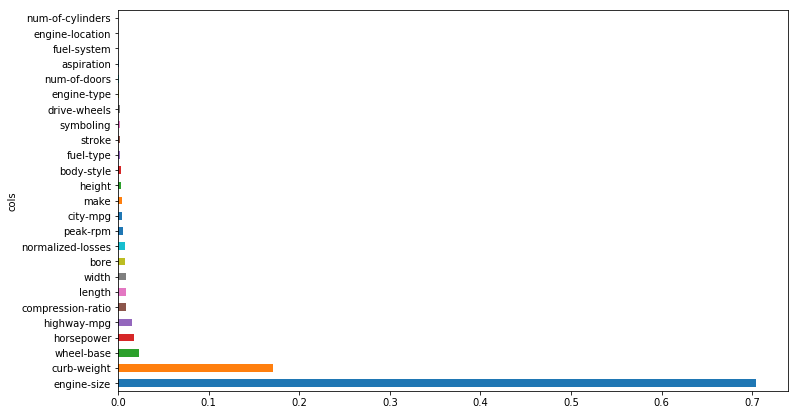

In [81]:
def plot_fi(fi):return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:40])

In [82]:
m = RandomForestRegressor(n_estimators=1,max_depth=1)

In [83]:
m.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [84]:
m.score(X_train,y_train)

0.71032394450777958

In [85]:
m.score(X_valid,y_valid)

0.099082380258380787

In [86]:
X_train = X_train.reset_index(drop=True)

In [87]:
y_train = y_train.reset_index(drop=True)

In [89]:
y_train

0      22470.0
1      15510.0
2       7395.0
3       7129.0
4      13200.0
5       5399.0
6       8845.0
7       9895.0
8       5195.0
9      32528.0
10      5151.0
11      8358.0
12     17075.0
13     10245.0
14      7053.0
15      9959.0
16      8189.0
17     18399.0
18      6575.0
19      7198.0
20      6855.0
21      7295.0
22     10945.0
23     17710.0
24      7463.0
25     10198.0
26      7689.0
27      8495.0
28      7999.0
29     14399.0
        ...   
134    21105.0
135     8495.0
136    19699.0
137    11199.0
138     6488.0
139    37028.0
140     6649.0
141     6918.0
142     7299.0
143     6295.0
144    12629.0
145     7898.0
146     6529.0
147    34028.0
148     7603.0
149     6785.0
150    18420.0
151    16900.0
152     6692.0
153    13845.0
154     6695.0
155    40960.0
156     6229.0
157     5389.0
158     6669.0
159    16515.0
160    36880.0
161     9279.0
162    45400.0
163    13295.0
Name: price, Length: 164, dtype: float64

In [90]:
X_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,-1.0,95.0,20,0,1,1,3,2,0,109.1,...,3,145.0,3,3.01,3.40,23.0,106.0,4800.0,26.0,27.0
1,2.0,104.0,16,1,0,1,3,1,0,99.1,...,2,121.0,5,3.54,3.07,9.3,110.0,5250.0,21.0,28.0
2,1.0,113.0,8,1,0,1,3,1,0,93.1,...,2,91.0,1,3.08,3.15,9.0,68.0,5000.0,31.0,38.0
3,1.0,101.0,5,1,0,2,2,1,0,93.7,...,2,92.0,0,2.91,3.41,9.2,76.0,6000.0,30.0,34.0
4,0.0,161.0,12,0,1,1,3,2,0,107.9,...,2,152.0,3,3.70,3.52,21.0,95.0,4150.0,28.0,33.0
5,1.0,101.0,5,1,0,2,2,1,0,93.7,...,2,79.0,0,2.91,3.07,10.1,60.0,5500.0,38.0,42.0
6,0.0,85.0,5,1,0,1,3,1,0,96.5,...,2,110.0,0,3.15,3.58,9.0,86.0,5800.0,27.0,33.0
7,2.0,110.0,15,1,0,2,2,1,0,96.1,...,2,132.0,5,3.46,3.90,8.7,92.0,5200.0,23.0,31.0
8,1.0,104.0,8,1,0,2,2,1,0,93.1,...,2,91.0,1,3.03,3.15,9.0,68.0,5000.0,30.0,31.0
9,3.0,110.0,14,1,0,2,1,2,1,89.5,...,3,194.0,5,3.74,2.90,9.5,207.0,5900.0,17.0,25.0


## Best Split

In [114]:
x,y = X_train['city-mpg'],y_train
temp = np.inf
score_position = [1,1]

for i in range(len(X_train)):
    lhs = x <= x[i]
    rhs = x >  x[i]
    if rhs.sum()==0: continue
    lhs_std = y[lhs].std()
    rhs_std = y[rhs].std()
    current_score = lhs_std*lhs.sum() + rhs_std*rhs.sum()
    if current_score < temp:
        score_position[0] = current_score
        score_position[1] = x[i]
        temp = current_score
print(score_position)
        

[842174.92271100753, 22.0]


In [117]:
def best_split(X_train,y,name):
    x = X_train[name]
    temp = np.inf
    score_position = [1,1]

    for i in range(len(X_train)):
        lhs = x <= x[i]
        rhs = x >  x[i]
        if rhs.sum()==0: continue
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        current_score = lhs_std*lhs.sum() + rhs_std*rhs.sum()
        if current_score < temp:
            score_position[0],score_position[1], temp = current_score,x[i],current_score 
    return(score_position)

In [118]:
best_split(X_train,y_train,'city-mpg')

[842174.92271100753, 22.0]

In [95]:
X_train['normalized-losses'][0]

95.0

In [97]:
 X_train['normalized-losses'] > X_train['normalized-losses'][i]

0      False
1      False
2       True
3      False
4       True
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13      True
14     False
15      True
16      True
17      True
18     False
19     False
20      True
21     False
22      True
23      True
24     False
25     False
26      True
27      True
28     False
29     False
       ...  
134     True
135    False
136     True
137     True
138    False
139    False
140     True
141    False
142     True
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151     True
152     True
153    False
154     True
155    False
156     True
157     True
158     True
159    False
160    False
161     True
162    False
163    False
Name: normalized-losses, Length: 164, dtype: bool

In [151]:
numeric_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
for col in numeric_cols:
    train[col].fillna(train[col].median(),inplace = True)
for col in categorical_cols:
    train[col].replace(np.nan, 'NA', regex=True, inplace = True)

In [160]:
best_split(train.drop('price',axis=1),train['price'].values,'city-mpg')

[1039555.0527561649, 22.0]

In [159]:
train.drop('price',axis=1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3.0,110.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0
1,3.0,110.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130.0,mpfi,3.47,2.68,9.00,111.0,5000.0,21.0,27.0
2,1.0,110.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152.0,mpfi,2.68,3.47,9.00,154.0,5000.0,19.0,26.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109.0,mpfi,3.19,3.40,10.00,102.0,5500.0,24.0,30.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136.0,mpfi,3.19,3.40,8.00,115.0,5500.0,18.0,22.0
5,2.0,110.0,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0
6,1.0,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0
7,1.0,110.0,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136.0,mpfi,3.19,3.40,8.50,110.0,5500.0,19.0,25.0
8,1.0,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131.0,mpfi,3.13,3.40,8.30,140.0,5500.0,17.0,20.0
9,0.0,110.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,five,131.0,mpfi,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
